In [1]:
# titanic_eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Load dataset
df = sns.load_dataset('titanic')  # convenient for examples; similar columns to Kaggle titanic
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (891, 15)


In [6]:
# Quick peek
display(df.head())
print("\nInfo:")
print(df.info())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [7]:
# Initial summary
print("\nNumerical summary:")
display(df.describe(include=[np.number]).T)
print("\nCategorical summary:")
display(df.describe(include=['object','category','bool']).T)


Numerical summary:


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Categorical summary:


,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
adult_male,891,2,True,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549
alone,891,2,True,537


In [8]:
# Missing values overview
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_df = pd.concat([missing, missing_pct], axis=1)
missing_df.columns = ['missing_count', 'missing_pct']
print("\nMissing values by column:")
display(missing_df)


Missing values by column:


,missing_count,missing_pct
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [12]:
#drop duplicate values
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\nDropped {before-after} duplicate rows.")




Dropped 107 duplicate rows.


In [13]:

if df['embarked'].isnull().sum() > 0:
    mode_emb = df['embarked'].mode()[0]
    df['embarked'] = df['embarked'].fillna(mode_emb)
    print(f"Filled missing 'embarked' with mode: {mode_emb}")

Filled missing 'embarked' with mode: S


In [35]:
#cleaning, missing values
df['pclass'] = df['pclass'].astype('category')
df['survived'] = df['survived'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['class'] = df['class'].astype('category')

print("\nAfter cleaning, missing values:")
display(df.isnull().sum().sort_values(ascending=False))
    


After cleaning, missing values:


deck           582
embark_town      2
survived         0
pclass           0
sibsp            0
parch            0
sex              0
age              0
embarked         0
fare             0
who              0
class            0
adult_male       0
alive            0
alone            0
has_deck         0
dtype: int64

In [4]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)
df['age_group'] = pd.cut(df['age'], bins=[0,12,18,30,50,80], labels=['child','teen','young_adult','adult','senior'])

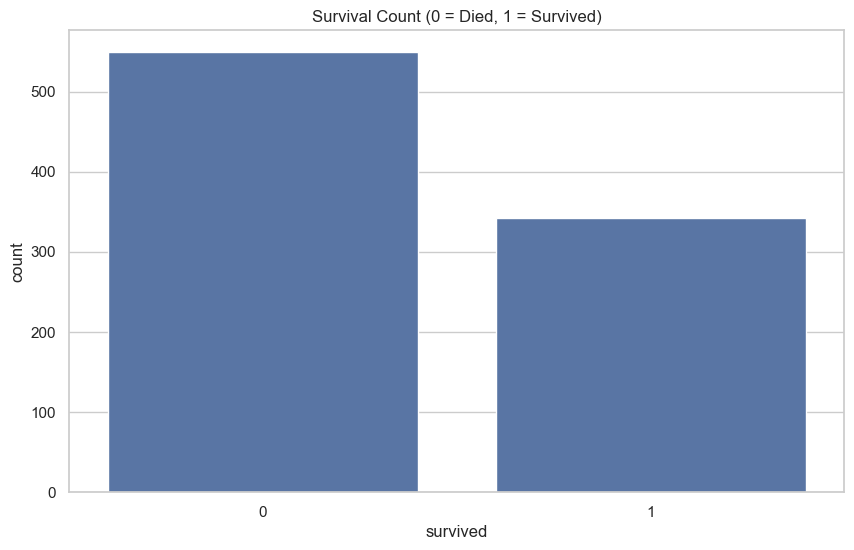

C:\Users\jayakumar\AppData\Local\Temp\ipykernel_6336\2154840758.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None)


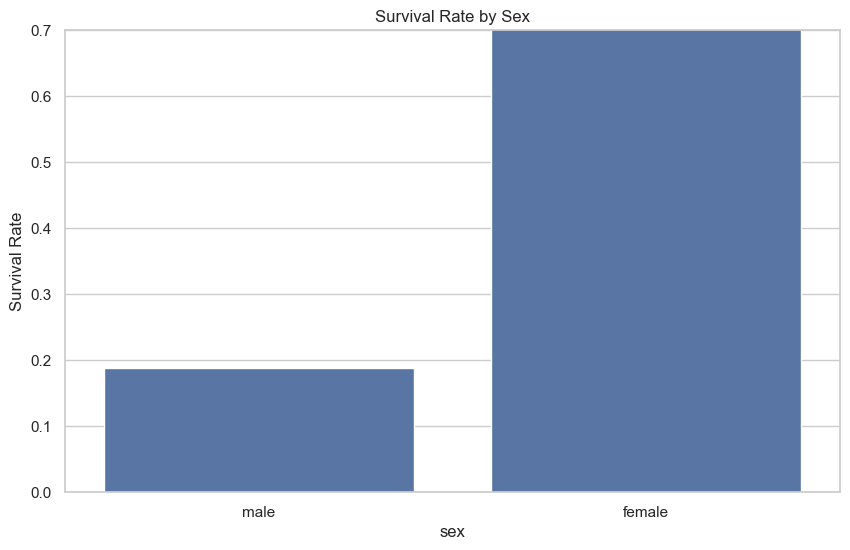

C:\Users\jayakumar\AppData\Local\Temp\ipykernel_6336\2154840758.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None)


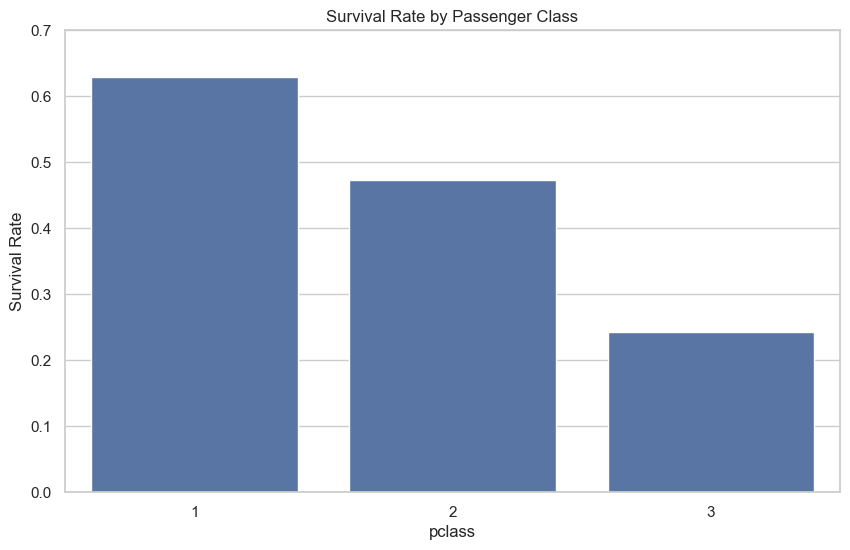

In [11]:
#Exploratory visualizations
#Survival count
plt.figure()
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

#Survival rate by sex
plt.figure()
sns.barplot(x='sex', y='survived', data=df, ci=None)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.ylim(0, 0.7)
plt.show()

#Survival rate by Passengerclass
plt.figure()
sns.barplot(x='pclass', y='survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 0.7)
plt.show()




C:\Users\jayakumar\AppData\Local\Temp\ipykernel_6336\1222939963.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['survived']==0,'age'].dropna(), label='Died', shade=True)
C:\Users\jayakumar\AppData\Local\Temp\ipykernel_6336\1222939963.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['survived']==1,'age'].dropna(), label='Survived', shade=True)


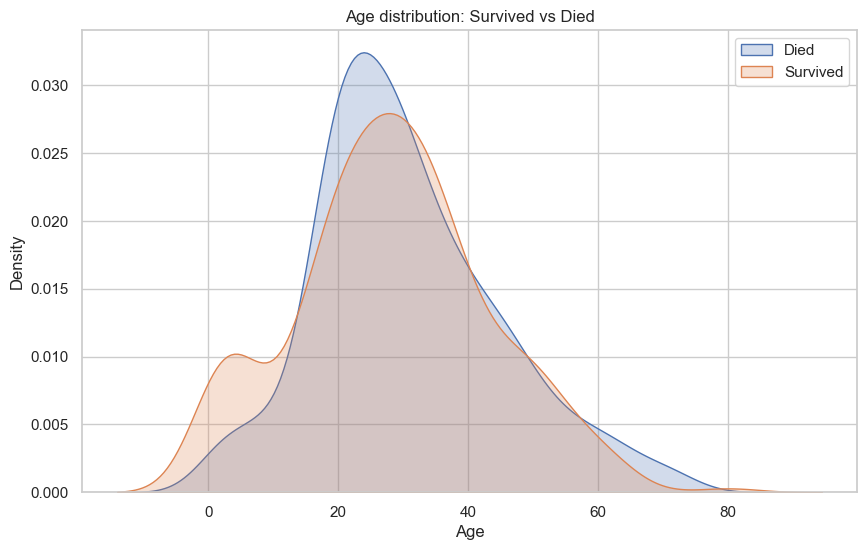

In [10]:
#Age distribution by survival and Died
plt.figure()
sns.kdeplot(df.loc[df['survived']==0,'age'].dropna(), label='Died', shade=True)
sns.kdeplot(df.loc[df['survived']==1,'age'].dropna(), label='Survived', shade=True)
plt.title('Age distribution: Survived vs Died')
plt.xlabel('Age')
plt.legend()
plt.show()

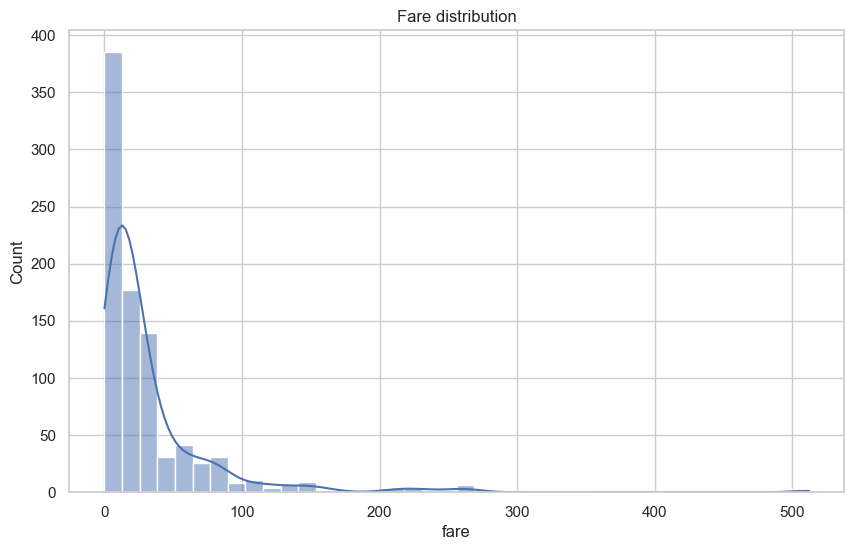

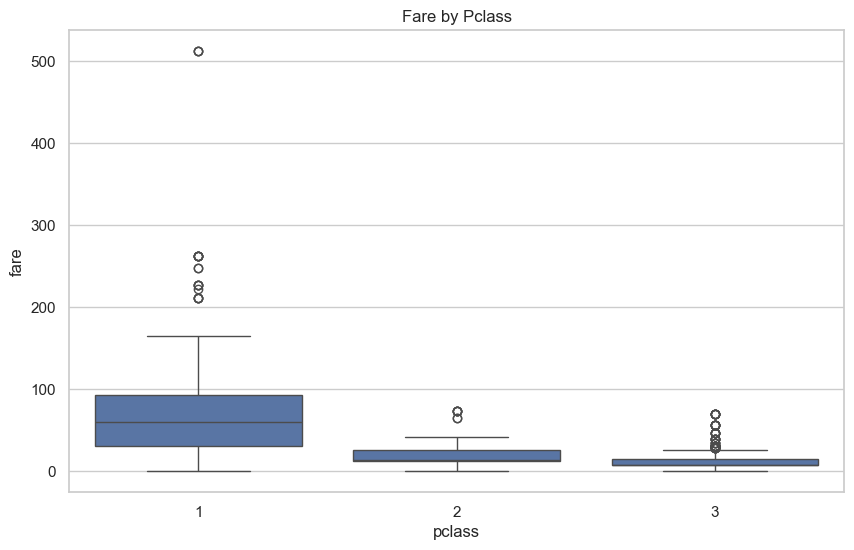

In [12]:
#Fare distribution and boxplot by class
plt.figure()
sns.histplot(df['fare'].dropna(), bins=40, kde=True)
plt.title('Fare distribution')
plt.show()

plt.figure()
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare by Pclass')
plt.show()

In [73]:
#Save cleaned dataset
cleaned_path = 'titanic_cleaned.csv'
df.to_csv(cleaned_path, index=False)
print(f"\nCleaned data saved to {cleaned_path}")


Cleaned data saved to titanic_cleaned.csv
